<a href="https://colab.research.google.com/github/melainiess/Feature-Extraction-from-Audio-Sound1/blob/main/Feature_extraction_from_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#forda access to gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa
audio_path =  "/content/drive/My Drive/Colab Notebooks/FEFAS/audio1.wav"
x , sr = librosa.load(audio_path)

In [ ]:
import IPython.display as ipd
ipd.Audio(audio_path)

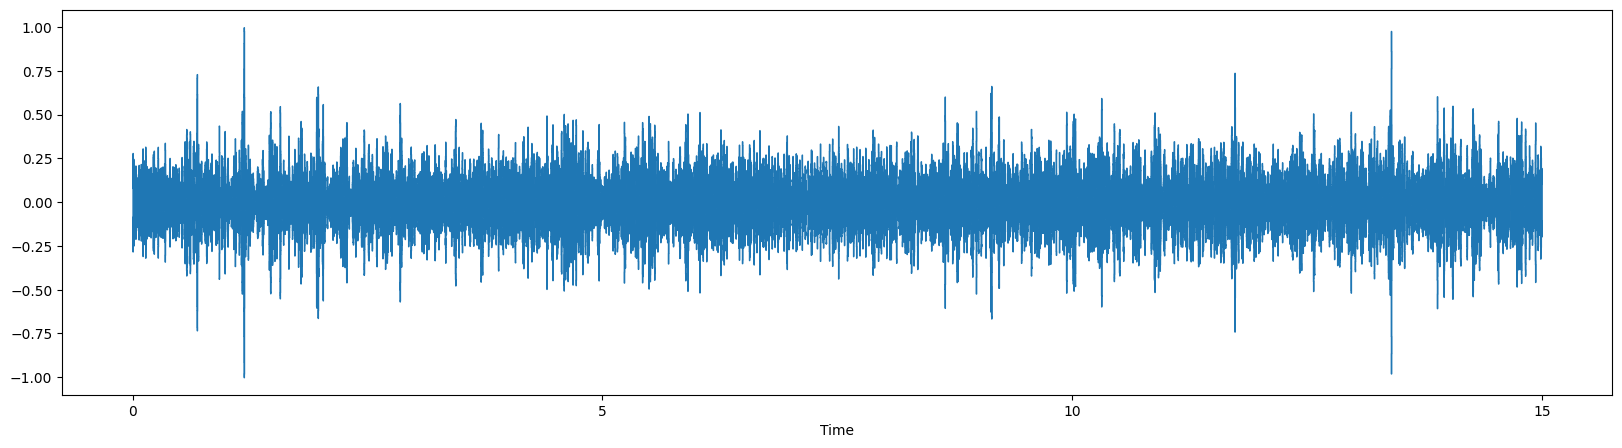

In [ ]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(20, 5))
librosa.display.waveshow(x, sr=sr)

spectogram

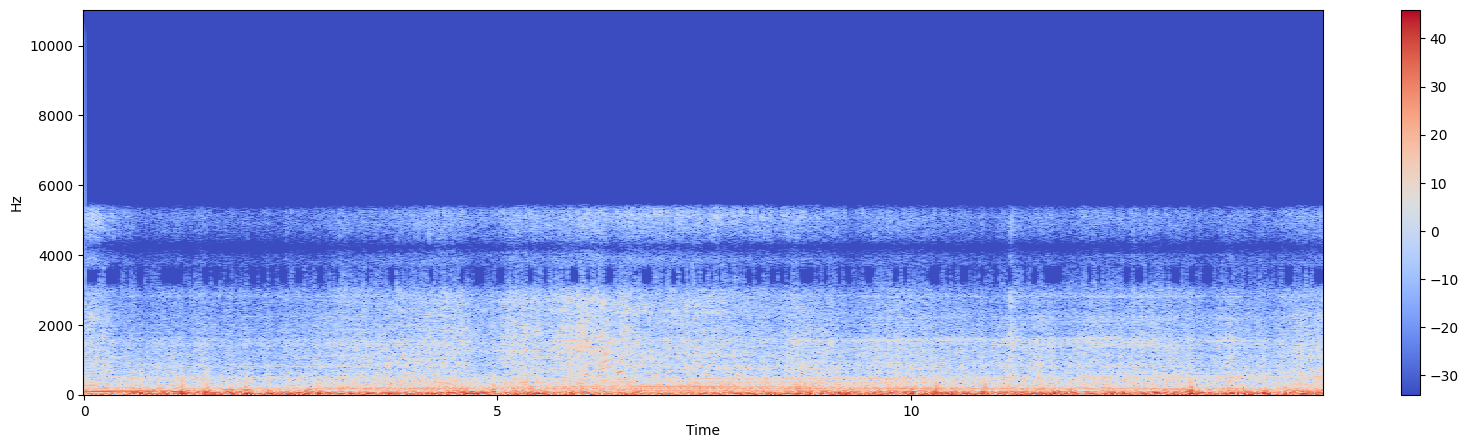

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

Log Frequency axis

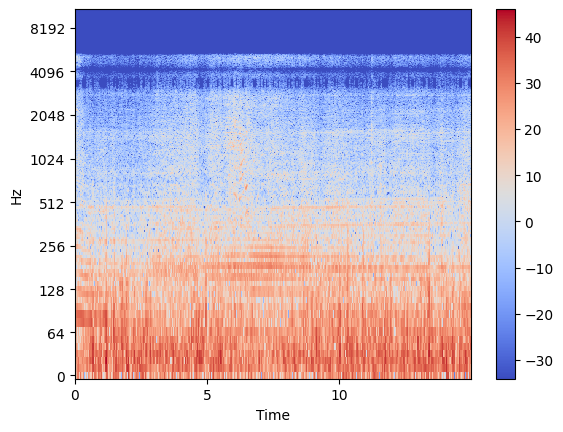

In [ ]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

Creating an audio signal

In [ ]:
import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz

Playing the sound

In [ ]:
ipd.Audio(x, rate=sr) # load a NumPy array

In [ ]:
#pip install librosa
#pip install scipy
! pip install soundfile # change librosa to soundfile

Saving the signal

In [ ]:
import soundfile as sf

sf.write('/content/drive/My Drive/Colab Notebooks/FEFAS/audio1.wav', x, sr)

In [ ]:
x, sr = librosa.load('/content/drive/My Drive/Colab Notebooks/FEFAS/audio11.wav')
ipd.Audio(x, rate=sr)

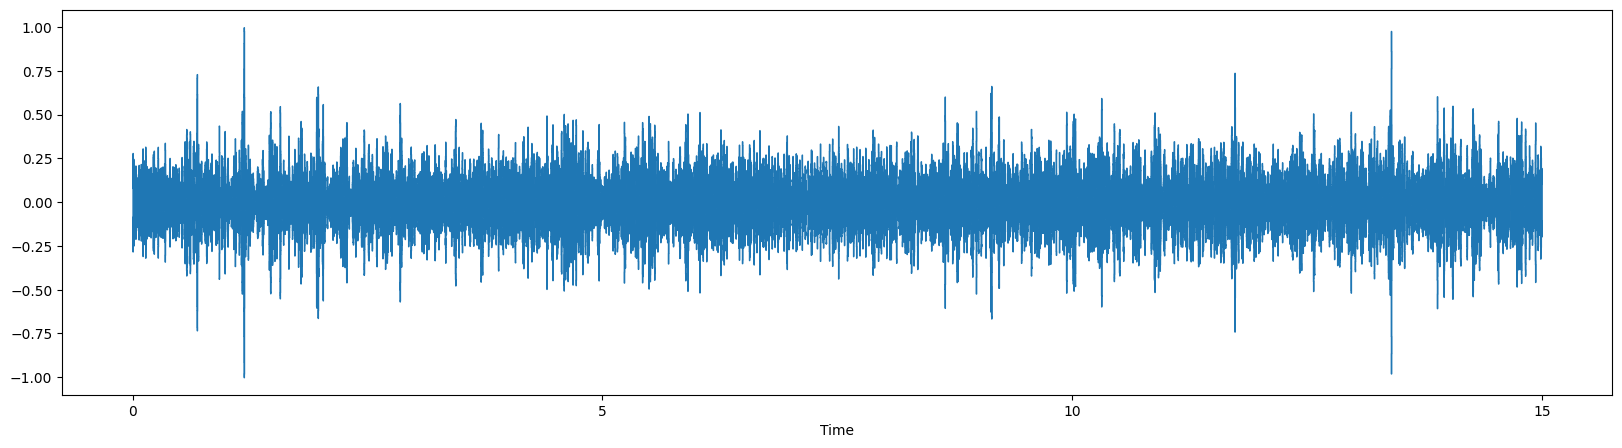

In [ ]:
#Plot the signal:
plt.figure(figsize=(20, 5))
librosa.display.waveshow(x, sr=sr)

1. Zero Crossing Rate

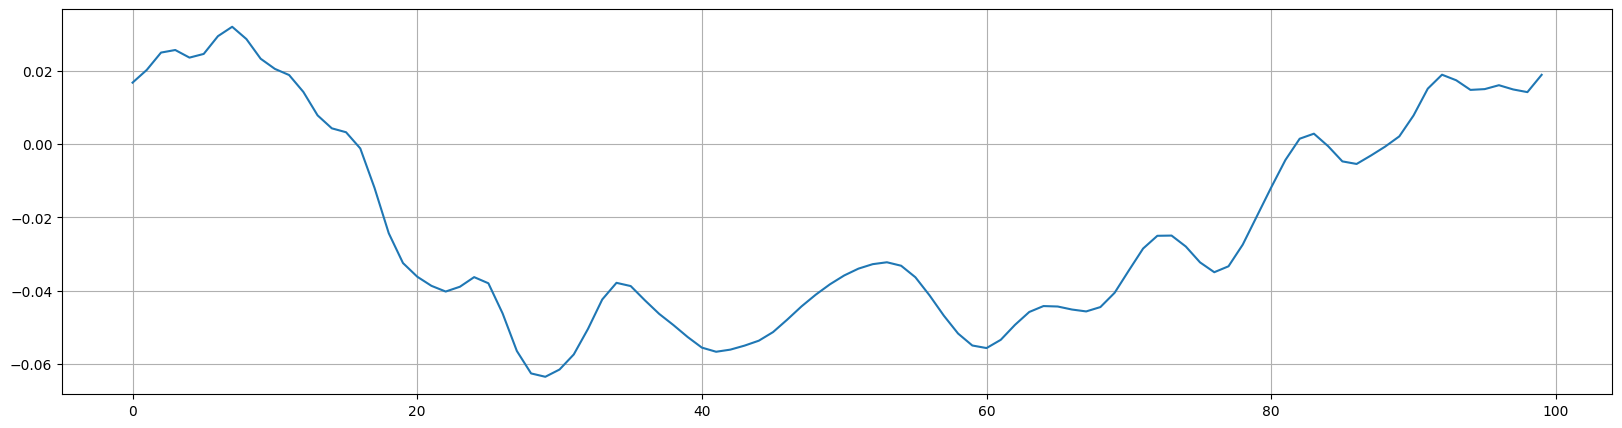

In [ ]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.grid()

I count 6 zero crossings. Let's compute the zero crossings using librosa.

In [ ]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape

(100,)

In [ ]:
print(sum(zero_crossings))

4


2.Spectral Centroid

In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

In [ ]:
# Computing the time variable for visualization
plt.figure(figsize=(20,5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

3.Spectral Rolloff

In [ ]:
plt.figure(figsize=(20,5))
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

4.MFCC

In [ ]:
plt.figure(figsize=(20,5))
x, fs = librosa.load('../input/train_curated/0006ae4e.wav')
librosa.display.waveshow(x, sr=sr)

In [ ]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

Feature Scaling
Let's scale the MFCCs such that each coefficient dimension has zero mean and unit variance:

In [ ]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

In [ ]:
plt.figure(figsize=(20,8))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

Chroma Frequencies

In [ ]:
# Loadign the file
x, sr = librosa.load("/content/drive/My Drive/Colab Notebooks/FEFAS/audio1.wav")
ipd.Audio(x, rate=sr)

In [ ]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')